#                                      MEGALINE PROJECT

In this project, i will investigate data for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.
I am going to carry out a preliminary analysis of the plans based on a relatively small client selection. I have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. In the project, I will  analyze clients' behavior and determine which prepaid plan brings in more revenue.


### Data Exploring

In [8]:
# Loading all the libraries i will use:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import math 
from functools import reduce
from scipy import stats as st
import warnings
warnings.filterwarnings("ignore")
import warnings
import requests
import io

In [10]:
url_calls = "https://raw.githubusercontent.com/yoav-karsenty/Statistical-Data-Analysis-/main/megaline_calls.csv" 

url_messages = "https://raw.githubusercontent.com/yoav-karsenty/Statistical-Data-Analysis-/main/megaline_messages.csv" 

url_plans = "https://raw.githubusercontent.com/yoav-karsenty/Statistical-Data-Analysis-/main/megaline_plans.csv" 


download_calls = requests.get(url_calls).content
download_internet = requests.get(url_internet).content
download_users = requests.get(url_users).content
download_messages = requests.get(url_messages).content
download_plans = requests.get(url_plans).content

# Reading the downloaded content and turning it into a pandas dataframe
#saving the data frames as variables
calls = pd.read_csv(io.StringIO(download_calls.decode('utf-8')))
internet =pd.read_csv(io.StringIO(download_internet.decode('utf-8')))
messages = pd.read_csv(io.StringIO(download_messages.decode('utf-8')))
plans = pd.read_csv(io.StringIO(download_plans.decode('utf-8')))
users = pd.read_csv(io.StringIO(download_users.decode('utf-8')))



Next, i wil explore the datasets:

In [11]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [12]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [13]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [14]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [15]:
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [16]:
calls.head(10)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40


In [17]:
#checking if there are calls that lasted 0 seconds (unanswered calls or misdials)
calls[calls.duration == 0]

,id,user_id,call_date,duration
19,1001_4,1001,2018-12-05,0.0
25,1001_13,1001,2018-12-24,0.0
31,1001_30,1001,2018-10-17,0.0
32,1001_31,1001,2018-11-03,0.0
34,1001_35,1001,2018-12-21,0.0
...,...,...,...,...
137714,1499_183,1499,2018-11-10,0.0
137715,1499_184,1499,2018-09-15,0.0
137720,1499_189,1499,2018-12-27,0.0
137722,1499_191,1499,2018-12-24,0.0


In [18]:
calls[calls.duration == 0].shape[0] / calls.shape[0]

0.1948233927469416

I see that the percentage of 0 seconds calls is pretty high and removing those rows will distort the data. 
On the other hand, i know the clients are charged by minutes and not by number of calls, so i can just leave those rows be.


### Data Preparation 

Next, i want to add a 'month' column so i could calculate the revenue from each client for eac month. in order to do that i will check that all of our data is from the same year, and then i will write a function that could help me add the 'month' column in other datasets too.

In [19]:
calls.min()

id             1000_145
user_id            1000
call_date    2018-01-15
duration            0.0
dtype: object

In [20]:
calls.max()

id              1499_99
user_id            1499
call_date    2018-12-31
duration           37.6
dtype: object

In [21]:
def add_month(df,col):
    df[col] = pd.to_datetime(df[col], format = '%Y-%m-%d' ) 
    df['month'] = pd.DatetimeIndex(df[col]).month
    

In [22]:
add_month(calls,'call_date')

I know that Megaline rounds seconds up to minutes, and megabytes to gigabytes. For calls, each individual call is rounded up:if the call lasted one second or more , it will be counted as one minute. For web traffic, individual web sessions are not rounded up. Instead, the total for the month is rounded up. If someone uses 1025 megabytes this month, they will be charged for 2 gigabytes.

In [23]:
#Rounding up the calls
calls['duration']=calls['duration'].apply(np.ceil)


In [24]:
#creating a pivot table that will calculate the number of calls and their duration per month.
calls_sum_count = calls.pivot_table(
    index = ('user_id','month'), 
    values = 'duration', 
    aggfunc = ('count','sum')).reset_index()
calls_sum_count.columns = ['user_id','month','calls','duration']
calls_sum_count.head()

,user_id,month,calls,duration
0,1000,12,16,124.0
1,1001,8,27,182.0
2,1001,9,49,315.0
3,1001,10,65,393.0
4,1001,11,64,426.0


Next i am going to do the exact same process with the messages dataset and the internet dataset:

In [25]:
#applyng the add_month functio and creating a pivot table:
add_month(messages,'message_date')

messages_count = messages.pivot_table(
    index = ('user_id','month'), 
    values = 'id', 
    aggfunc = ('count')).reset_index()
messages_count.head()
messages_count.columns = ['user_id','month','messages']
messages_count.head()


,user_id,month,messages
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36


In [26]:
#applyng the add_month functio and creating a pivot table:

add_month(internet,'session_date')
internet_sum = internet.pivot_table(
    index = ('user_id','month'), 
    values = 'mb_used', 
    aggfunc = ('sum')).reset_index()
internet_sum['gigas'] = internet_sum['mb_used'] / 1000
internet_sum['gigas'] = np.ceil(internet_sum['gigas'])
internet_sum.head()

,user_id,month,mb_used,gigas
0,1000,12,1901.47,2.0
1,1001,8,6919.15,7.0
2,1001,9,13314.82,14.0
3,1001,10,22330.49,23.0
4,1001,11,18504.30,19.0


Next, i will merge the datasets to i could have all the information in one dataframe:


In [27]:
dfs = [calls_sum_count,messages_count,internet_sum]
total_telecom = reduce(lambda  left,right:pd.merge(left,right,on = ['user_id','month'],how = 'outer'),dfs)

In [28]:
total_telecom.head()

,user_id,month,calls,duration,messages,mb_used,gigas
0,1000,12,16.0,124.0,11.0,1901.47,2.0
1,1001,8,27.0,182.0,30.0,6919.15,7.0
2,1001,9,49.0,315.0,44.0,13314.82,14.0
3,1001,10,65.0,393.0,53.0,22330.49,23.0
4,1001,11,64.0,426.0,36.0,18504.30,19.0


In [29]:
total_telecom = total_telecom.merge(right = users, on = 'user_id',how = 'outer' )

In [30]:
total_telecom.head()

,user_id,month,calls,duration,messages,mb_used,gigas,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,12.0,16.0,124.0,11.0,1901.47,2.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,8.0,27.0,182.0,30.0,6919.15,7.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1001,9.0,49.0,315.0,44.0,13314.82,14.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
3,1001,10.0,65.0,393.0,53.0,22330.49,23.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
4,1001,11.0,64.0,426.0,36.0,18504.30,19.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN


I have just one  problem with the dataframe i created: it only contains information on actions the clients made.I need to include data about users that assigned for plan but didn't use service ( they still need to pay monthly fee). in order to do that, i will check if this is a real issue, and if it is, i will add them to the dataframe.

In [31]:
lost_users = total_telecom[(total_telecom['mb_used'].isnull()) & (total_telecom['messages'].isnull()) &(total_telecom['calls'].isnull()) ]
lost_users

,user_id,month,calls,duration,messages,mb_used,gigas,first_name,last_name,age,city,reg_date,plan,churn_date
2293,1025,NaN,NaN,NaN,NaN,NaN,NaN,Jess,Wilkinson,64,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-10-28,ultimate,NaN
2294,1129,NaN,NaN,NaN,NaN,NaN,NaN,Marin,Bolton,70,"Baton Rouge, LA MSA",2018-11-10,surf,2018-12-27
2295,1143,NaN,NaN,NaN,NaN,NaN,NaN,Lorina,Stevens,69,"Cincinnati, OH-KY-IN MSA",2018-10-26,surf,NaN
2296,1269,NaN,NaN,NaN,NaN,NaN,NaN,Irving,Thompson,39,"Dallas-Fort Worth-Arlington, TX MSA",2018-09-13,ultimate,2018-12-15
2297,1275,NaN,NaN,NaN,NaN,NaN,NaN,Elvie,Velazquez,33,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-11-29,ultimate,NaN
2298,1307,NaN,NaN,NaN,NaN,NaN,NaN,Kristopher,Lang,28,"Boston-Cambridge-Newton, MA-NH MSA",2018-12-31,surf,NaN
2299,1319,NaN,NaN,NaN,NaN,NaN,NaN,Eliseo,Carson,21,"Colorado Springs, CO MSA",2018-06-17,surf,NaN
2300,1378,NaN,NaN,NaN,NaN,NaN,NaN,Mckinley,Clayton,22,"Denver-Aurora-Lakewood, CO MSA",2018-12-17,surf,NaN
2301,1463,NaN,NaN,NaN,NaN,NaN,NaN,Dinorah,Simmons,30,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-11-27,ultimate,NaN
2302,1473,NaN,NaN,NaN,NaN,NaN,NaN,Kirk,Velez,61,"Louisville/Jefferson County, KY-IN MSA",2018-12-31,surf,NaN


In [32]:
#calculating the number of month they used, assuming that we need it till the end of 2018
lost_users['churn_date']=lost_users['churn_date'].fillna('2018-12-31')
lost_users['months_usage']=(pd.to_datetime(lost_users['churn_date'])-pd.to_datetime(lost_users['reg_date']))
lost_users['months_usage']=lost_users['months_usage'].apply(lambda x: int(x/np.timedelta64(1, 'M'))+1)
lost_users

,user_id,month,calls,duration,messages,mb_used,gigas,first_name,last_name,age,city,reg_date,plan,churn_date,months_usage
2293,1025,NaN,NaN,NaN,NaN,NaN,NaN,Jess,Wilkinson,64,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-10-28,ultimate,2018-12-31,3
2294,1129,NaN,NaN,NaN,NaN,NaN,NaN,Marin,Bolton,70,"Baton Rouge, LA MSA",2018-11-10,surf,2018-12-27,2
2295,1143,NaN,NaN,NaN,NaN,NaN,NaN,Lorina,Stevens,69,"Cincinnati, OH-KY-IN MSA",2018-10-26,surf,2018-12-31,3
2296,1269,NaN,NaN,NaN,NaN,NaN,NaN,Irving,Thompson,39,"Dallas-Fort Worth-Arlington, TX MSA",2018-09-13,ultimate,2018-12-15,4
2297,1275,NaN,NaN,NaN,NaN,NaN,NaN,Elvie,Velazquez,33,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-11-29,ultimate,2018-12-31,2
2298,1307,NaN,NaN,NaN,NaN,NaN,NaN,Kristopher,Lang,28,"Boston-Cambridge-Newton, MA-NH MSA",2018-12-31,surf,2018-12-31,1
2299,1319,NaN,NaN,NaN,NaN,NaN,NaN,Eliseo,Carson,21,"Colorado Springs, CO MSA",2018-06-17,surf,2018-12-31,7
2300,1378,NaN,NaN,NaN,NaN,NaN,NaN,Mckinley,Clayton,22,"Denver-Aurora-Lakewood, CO MSA",2018-12-17,surf,2018-12-31,1
2301,1463,NaN,NaN,NaN,NaN,NaN,NaN,Dinorah,Simmons,30,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-11-27,ultimate,2018-12-31,2
2302,1473,NaN,NaN,NaN,NaN,NaN,NaN,Kirk,Velez,61,"Louisville/Jefferson County, KY-IN MSA",2018-12-31,surf,2018-12-31,1


In [33]:
#creating a month count column i will later use:
lost_users['months_count']=lost_users['plan'].apply(lambda x: 1 )
lost_users

,user_id,month,calls,duration,messages,mb_used,gigas,first_name,last_name,age,city,reg_date,plan,churn_date,months_usage,months_count
2293,1025,NaN,NaN,NaN,NaN,NaN,NaN,Jess,Wilkinson,64,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-10-28,ultimate,2018-12-31,3,1
2294,1129,NaN,NaN,NaN,NaN,NaN,NaN,Marin,Bolton,70,"Baton Rouge, LA MSA",2018-11-10,surf,2018-12-27,2,1
2295,1143,NaN,NaN,NaN,NaN,NaN,NaN,Lorina,Stevens,69,"Cincinnati, OH-KY-IN MSA",2018-10-26,surf,2018-12-31,3,1
2296,1269,NaN,NaN,NaN,NaN,NaN,NaN,Irving,Thompson,39,"Dallas-Fort Worth-Arlington, TX MSA",2018-09-13,ultimate,2018-12-15,4,1
2297,1275,NaN,NaN,NaN,NaN,NaN,NaN,Elvie,Velazquez,33,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-11-29,ultimate,2018-12-31,2,1
2298,1307,NaN,NaN,NaN,NaN,NaN,NaN,Kristopher,Lang,28,"Boston-Cambridge-Newton, MA-NH MSA",2018-12-31,surf,2018-12-31,1,1
2299,1319,NaN,NaN,NaN,NaN,NaN,NaN,Eliseo,Carson,21,"Colorado Springs, CO MSA",2018-06-17,surf,2018-12-31,7,1
2300,1378,NaN,NaN,NaN,NaN,NaN,NaN,Mckinley,Clayton,22,"Denver-Aurora-Lakewood, CO MSA",2018-12-17,surf,2018-12-31,1,1
2301,1463,NaN,NaN,NaN,NaN,NaN,NaN,Dinorah,Simmons,30,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-11-27,ultimate,2018-12-31,2,1
2302,1473,NaN,NaN,NaN,NaN,NaN,NaN,Kirk,Velez,61,"Louisville/Jefferson County, KY-IN MSA",2018-12-31,surf,2018-12-31,1,1


In [34]:
#creating a list of "counts" depending on the number of months, so that we'd be able
#to generate  rows  for each month and add it to our calculation 
lost_users['list_count']=lost_users.apply(lambda row: [(row.months_count)]*(row.months_usage), axis=1 )
lost_users

,user_id,month,calls,duration,messages,mb_used,gigas,first_name,last_name,age,city,reg_date,plan,churn_date,months_usage,months_count,list_count
2293,1025,NaN,NaN,NaN,NaN,NaN,NaN,Jess,Wilkinson,64,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-10-28,ultimate,2018-12-31,3,1,"[1, 1, 1]"
2294,1129,NaN,NaN,NaN,NaN,NaN,NaN,Marin,Bolton,70,"Baton Rouge, LA MSA",2018-11-10,surf,2018-12-27,2,1,"[1, 1]"
2295,1143,NaN,NaN,NaN,NaN,NaN,NaN,Lorina,Stevens,69,"Cincinnati, OH-KY-IN MSA",2018-10-26,surf,2018-12-31,3,1,"[1, 1, 1]"
2296,1269,NaN,NaN,NaN,NaN,NaN,NaN,Irving,Thompson,39,"Dallas-Fort Worth-Arlington, TX MSA",2018-09-13,ultimate,2018-12-15,4,1,"[1, 1, 1, 1]"
2297,1275,NaN,NaN,NaN,NaN,NaN,NaN,Elvie,Velazquez,33,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-11-29,ultimate,2018-12-31,2,1,"[1, 1]"
2298,1307,NaN,NaN,NaN,NaN,NaN,NaN,Kristopher,Lang,28,"Boston-Cambridge-Newton, MA-NH MSA",2018-12-31,surf,2018-12-31,1,1,[1]
2299,1319,NaN,NaN,NaN,NaN,NaN,NaN,Eliseo,Carson,21,"Colorado Springs, CO MSA",2018-06-17,surf,2018-12-31,7,1,"[1, 1, 1, 1, 1, 1, 1]"
2300,1378,NaN,NaN,NaN,NaN,NaN,NaN,Mckinley,Clayton,22,"Denver-Aurora-Lakewood, CO MSA",2018-12-17,surf,2018-12-31,1,1,[1]
2301,1463,NaN,NaN,NaN,NaN,NaN,NaN,Dinorah,Simmons,30,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-11-27,ultimate,2018-12-31,2,1,"[1, 1]"
2302,1473,NaN,NaN,NaN,NaN,NaN,NaN,Kirk,Velez,61,"Louisville/Jefferson County, KY-IN MSA",2018-12-31,surf,2018-12-31,1,1,[1]


In [35]:
#generate those additional rows
lost_users = lost_users.explode('list_count')


In [36]:
#filling the issing values so i wont get errors later
lost_users.fillna(0,inplace = True)

In [37]:
lost_users

,user_id,month,calls,duration,messages,mb_used,gigas,first_name,last_name,age,city,reg_date,plan,churn_date,months_usage,months_count,list_count
2293,1025,0.0,0.0,0.0,0.0,0.0,0.0,Jess,Wilkinson,64,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-10-28,ultimate,2018-12-31,3,1,1
2293,1025,0.0,0.0,0.0,0.0,0.0,0.0,Jess,Wilkinson,64,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-10-28,ultimate,2018-12-31,3,1,1
2293,1025,0.0,0.0,0.0,0.0,0.0,0.0,Jess,Wilkinson,64,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-10-28,ultimate,2018-12-31,3,1,1
2294,1129,0.0,0.0,0.0,0.0,0.0,0.0,Marin,Bolton,70,"Baton Rouge, LA MSA",2018-11-10,surf,2018-12-27,2,1,1
2294,1129,0.0,0.0,0.0,0.0,0.0,0.0,Marin,Bolton,70,"Baton Rouge, LA MSA",2018-11-10,surf,2018-12-27,2,1,1
2295,1143,0.0,0.0,0.0,0.0,0.0,0.0,Lorina,Stevens,69,"Cincinnati, OH-KY-IN MSA",2018-10-26,surf,2018-12-31,3,1,1
2295,1143,0.0,0.0,0.0,0.0,0.0,0.0,Lorina,Stevens,69,"Cincinnati, OH-KY-IN MSA",2018-10-26,surf,2018-12-31,3,1,1
2295,1143,0.0,0.0,0.0,0.0,0.0,0.0,Lorina,Stevens,69,"Cincinnati, OH-KY-IN MSA",2018-10-26,surf,2018-12-31,3,1,1
2296,1269,0.0,0.0,0.0,0.0,0.0,0.0,Irving,Thompson,39,"Dallas-Fort Worth-Arlington, TX MSA",2018-09-13,ultimate,2018-12-15,4,1,1
2296,1269,0.0,0.0,0.0,0.0,0.0,0.0,Irving,Thompson,39,"Dallas-Fort Worth-Arlington, TX MSA",2018-09-13,ultimate,2018-12-15,4,1,1


In [38]:
add_month(lost_users,'reg_date')

In [39]:
lost_users = lost_users.drop(columns=['months_count', 'list_count'])


In [40]:
indexNames = total_telecom[(total_telecom['mb_used'].isnull()) & (total_telecom['calls'].isnull()) & (total_telecom['messages'].isnull())].index

total_telecom.drop(indexNames,inplace = True)

In [41]:
total_telecom.shape

(2293, 14)

In [42]:
total_telecom = total_telecom.append(lost_users)

In [43]:
total_telecom.shape

(2319, 15)

In [44]:
#checking everything worked 
total_telecom[(total_telecom['mb_used'].isnull()) & (total_telecom['messages'].isnull()) &(total_telecom['calls'].isnull()) ]

,user_id,month,calls,duration,messages,mb_used,gigas,first_name,last_name,age,city,reg_date,plan,churn_date,months_usage


In [45]:
lost_usersid = []
for i in lost_users.user_id:
    lost_usersid.append(i)
lost_usersid   

[1025,
 1025,
 1025,
 1129,
 1129,
 1143,
 1143,
 1143,
 1269,
 1269,
 1269,
 1269,
 1275,
 1275,
 1307,
 1319,
 1319,
 1319,
 1319,
 1319,
 1319,
 1319,
 1378,
 1463,
 1463,
 1473]

In [46]:
active=total_telecom.groupby(['user_id'])['month'].unique().reset_index()
active.shape

(500, 2)

Now i need to check dor data for users that were not active in specific months

In [47]:
active_new=active.merge(users,how='left',on='user_id')
active_new['churn_date']=active_new['churn_date'].fillna('2018-12-31')
active_new = active_new.query('user_id not in @lost_usersid')

active_new

,user_id,month,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,[12.0],Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2018-12-31
1,1001,"[8.0, 9.0, 10.0, 11.0, 12.0]",Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2018-12-31
2,1002,"[10.0, 11.0, 12.0]",Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,2018-12-31
3,1003,[12.0],Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,2018-12-31
4,1004,"[5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0]",Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,2018-12-31
...,...,...,...,...,...,...,...,...,...
495,1495,"[9.0, 10.0, 11.0, 12.0]",Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,2018-12-31
496,1496,"[8.0, 9.0, 10.0, 11.0, 12.0]",Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,2018-12-31
497,1497,[12.0],Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,2018-12-31
498,1498,"[2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0,...",Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,2018-12-31


In [48]:
#getting months that users were registered for 
def months_range(row):
    reg_month=pd.to_datetime(row["reg_date"]).month
    end_month=pd.to_datetime(row["churn_date"]).month
    range_of_months=list(range(reg_month,end_month+1))
    return range_of_months
active_new['registered_months']=active_new.apply(months_range,axis=1)
active_new

,user_id,month,first_name,last_name,age,city,reg_date,plan,churn_date,registered_months
0,1000,[12.0],Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2018-12-31,[12]
1,1001,"[8.0, 9.0, 10.0, 11.0, 12.0]",Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2018-12-31,"[8, 9, 10, 11, 12]"
2,1002,"[10.0, 11.0, 12.0]",Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,2018-12-31,"[10, 11, 12]"
3,1003,[12.0],Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,2018-12-31,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]"
4,1004,"[5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0]",Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,2018-12-31,"[5, 6, 7, 8, 9, 10, 11, 12]"
...,...,...,...,...,...,...,...,...,...,...
495,1495,"[9.0, 10.0, 11.0, 12.0]",Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,2018-12-31,"[9, 10, 11, 12]"
496,1496,"[8.0, 9.0, 10.0, 11.0, 12.0]",Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,2018-12-31,"[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]"
497,1497,[12.0],Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,2018-12-31,[12]
498,1498,"[2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0,...",Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,2018-12-31,"[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]"


In [49]:
active_new['months_to_include']=active_new.apply(lambda row: list(set(row['registered_months'])-set(row['month'])),axis=1)
active_new

,user_id,month,first_name,last_name,age,city,reg_date,plan,churn_date,registered_months,months_to_include
0,1000,[12.0],Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2018-12-31,[12],[]
1,1001,"[8.0, 9.0, 10.0, 11.0, 12.0]",Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2018-12-31,"[8, 9, 10, 11, 12]",[]
2,1002,"[10.0, 11.0, 12.0]",Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,2018-12-31,"[10, 11, 12]",[]
3,1003,[12.0],Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,2018-12-31,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]"
4,1004,"[5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0]",Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,2018-12-31,"[5, 6, 7, 8, 9, 10, 11, 12]",[]
...,...,...,...,...,...,...,...,...,...,...,...
495,1495,"[9.0, 10.0, 11.0, 12.0]",Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,2018-12-31,"[9, 10, 11, 12]",[]
496,1496,"[8.0, 9.0, 10.0, 11.0, 12.0]",Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,2018-12-31,"[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]","[2, 3, 4, 5, 6, 7]"
497,1497,[12.0],Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,2018-12-31,[12],[]
498,1498,"[2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0,...",Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,2018-12-31,"[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]",[]


In [50]:
##removing users with 0, since they were using services in all of the months,
#so they've already been charged

active_new=active_new[active_new.months_to_include.apply(lambda x:len(x)>0)]
active_new

,user_id,month,first_name,last_name,age,city,reg_date,plan,churn_date,registered_months,months_to_include
3,1003,[12.0],Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,2018-12-31,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]"
5,1005,[12.0],Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,2018-12-31,"[11, 12]",[11]
7,1007,"[8.0, 9.0, 10.0, 11.0, 12.0]",Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,2018-12-31,"[7, 8, 9, 10, 11, 12]",[7]
8,1008,"[10.0, 11.0, 12.0]",Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,2018-12-31,"[8, 9, 10, 11, 12]","[8, 9]"
9,1009,"[5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0]",Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,2018-12-31,"[4, 5, 6, 7, 8, 9, 10, 11, 12]",[4]
...,...,...,...,...,...,...,...,...,...,...,...
492,1492,"[9.0, 10.0, 11.0, 12.0]",Elvie,Jones,63,"Portland-Vancouver-Hillsboro, OR-WA MSA",2018-03-07,surf,2018-12-31,"[3, 4, 5, 6, 7, 8, 9, 10, 11, 12]","[3, 4, 5, 6, 7, 8]"
493,1493,"[8.0, 9.0, 10.0, 11.0, 12.0]",Cicely,Wynn,18,"Boston-Cambridge-Newton, MA-NH MSA",2018-03-06,ultimate,2018-12-31,"[3, 4, 5, 6, 7, 8, 9, 10, 11, 12]","[3, 4, 5, 6, 7]"
494,1494,"[7.0, 8.0, 9.0, 10.0, 11.0, 12.0]",Preston,Downs,70,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-19,surf,2018-12-31,"[4, 5, 6, 7, 8, 9, 10, 11, 12]","[4, 5, 6]"
496,1496,"[8.0, 9.0, 10.0, 11.0, 12.0]",Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,2018-12-31,"[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]","[2, 3, 4, 5, 6, 7]"


In [51]:
#adjusting the dataframe (droping columns i dont need)
total_telecom = total_telecom.drop(columns=['months_usage'])
total_telecom.head()

,user_id,month,calls,duration,messages,mb_used,gigas,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,12.0,16.0,124.0,11.0,1901.47,2.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,8.0,27.0,182.0,30.0,6919.15,7.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1001,9.0,49.0,315.0,44.0,13314.82,14.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
3,1001,10.0,65.0,393.0,53.0,22330.49,23.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
4,1001,11.0,64.0,426.0,36.0,18504.30,19.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN


In [52]:
#adjusting the dataframe (exploding the lists i made,droping columns i dont need and adding columns i do need:)

active_new=active_new.explode('months_to_include')
active_new.drop(columns=['month','registered_months'],inplace = True)
active_new.rename({'months_to_include': 'month'}, axis=1, inplace=True)
active_new['calls']=0
active_new['mb_used']=0
active_new['duration']=0
active_new['messages']=0
active_new['gigas']=0

active_new

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,month,calls,mb_used,duration,messages,gigas
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,2018-12-31,1,0,0,0,0,0
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,2018-12-31,2,0,0,0,0,0
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,2018-12-31,3,0,0,0,0,0
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,2018-12-31,4,0,0,0,0,0
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,2018-12-31,5,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,2018-12-31,7,0,0,0,0,0
499,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,2018-12-31,8,0,0,0,0,0
499,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,2018-12-31,5,0,0,0,0,0
499,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,2018-12-31,6,0,0,0,0,0


In [53]:
total_telecom.shape

(2319, 14)

In [54]:
active_new.shape

(1031, 14)

In [55]:
total_telecom = total_telecom.append(active_new)


In [56]:
total_telecom.shape

(3350, 14)

Next i want to adress the missing values that we have in mb_used, messages and duration.From the investigations i made earlier, i know that these missing values happen when there is a client is not using all of the services in a particular month, so i can can jusr replace those values with 0. 

In [57]:
total_telecom['mb_used'].fillna(0,inplace = True)

In [58]:
total_telecom['gigas'].fillna(0,inplace = True)

In [59]:
total_telecom['duration'].fillna(0,inplace = True)

In [60]:
total_telecom['messages'].fillna(0,inplace = True)

Next, i will write a function that will calculate the revenue of each user per month according to the plan he/she uses.

In [61]:
#a function that will calculate the revenue
def surf_charger(row):
    
    minutes = row['duration']
    texts = row['messages']
    data = row['gigas']
    plan = row['plan']
    
    if plan == 'surf':
        

    
        if minutes <=500:

            m_cost = 0
        else:
            m_cost =(minutes - 500)* 0.03      

        if texts <= 50:
            t_cost = 0 
        else:
            t_cost = (texts - 50)* 0.03 

        if data  <= 15:
            d_cost = 0 
        else:
            d_cost = (data - 15) *10
        total_cost = d_cost + t_cost + m_cost +20
        return total_cost
    else:
        
        
        if minutes <=3000:

            m_cost = 0
        else:
            m_cost =(minutes - 3000)* 0.01      

        if texts <= 1000:
            t_cost = 0 
        else:
            t_cost = (texts - 1000)* 0.01 

        if data  <= 30:
            d_cost = 0 
        else:
            d_cost = (data - 30) *7
        total_cost = d_cost + t_cost + m_cost +70
        return total_cost


In [62]:
#adding a column 'montly_revenue' and applyng the function.
total_telecom['montly_revenue'] = total_telecom.apply(surf_charger,axis = 1)
   

In [63]:
# a function that detects the outliers in the dataset, if there are any
def outliers_detec(parameter, df):
    print('{}'.format(parameter))
    upper_limit = np.nanpercentile(df[parameter],99 )
    lower_limit = np.nanpercentile(df[parameter], 1)
    print()
    print('min border:',lower_limit)
    print('max border:',upper_limit)
    print()
    print('The outliers are considered to be values below',lower_limit, "and above",upper_limit)
    print('We have',len(df[(df[parameter]<lower_limit)|(df[parameter]>upper_limit)]),"values that we can consider outliers")
    print('-_-_-_-__-_-__-_-__-_-__-_-_-_-_-_-_-_-_-_-_')
   




In [64]:
#a loop that aplly the function 'outliers_detec' on the columns in Interest.
for parameter in ['duration','gigas','messages']:
    outliers_detec(parameter, total_telecom)


duration

min border: 0.0
max border: 1069.5099999999998

The outliers are considered to be values below 0.0 and above 1069.5099999999998
We have 34 values that we can consider outliers
-_-_-_-__-_-__-_-__-_-__-_-_-_-_-_-_-_-_-_-_
gigas

min border: 0.0
max border: 38.0

The outliers are considered to be values below 0.0 and above 38.0
We have 25 values that we can consider outliers
-_-_-_-__-_-__-_-__-_-__-_-_-_-_-_-_-_-_-_-_
messages

min border: 0.0
max border: 139.0

The outliers are considered to be values below 0.0 and above 139.0
We have 32 values that we can consider outliers
-_-_-_-__-_-__-_-__-_-__-_-_-_-_-_-_-_-_-_-_


Next, i will determine the filters i want to use to filter out outliers that i think are relevant from the investigation i just did.

In [65]:
filter1 =  (total_telecom['duration'] <= 1112.0)

In [66]:
filter2 = total_telecom['gigas'] < 38

In [67]:
filter3 = total_telecom['messages'] < 400

In [68]:
total_telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3350 entries, 0 to 499
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         3350 non-null   int64  
 1   month           3350 non-null   object 
 2   calls           3315 non-null   float64
 3   duration        3350 non-null   float64
 4   messages        3350 non-null   float64
 5   mb_used         3350 non-null   float64
 6   gigas           3350 non-null   float64
 7   first_name      3350 non-null   object 
 8   last_name       3350 non-null   object 
 9   age             3350 non-null   int64  
 10  city            3350 non-null   object 
 11  reg_date        3350 non-null   object 
 12  plan            3350 non-null   object 
 13  churn_date      1215 non-null   object 
 14  montly_revenue  3350 non-null   float64
dtypes: float64(6), int64(2), object(7)
memory usage: 418.8+ KB


In [69]:
clean_total_telecom = total_telecom[filter1 & filter2 &filter3]

In [70]:
clean_total_telecom.shape

(3294, 15)

In [71]:
clean_total_telecom.head()

,user_id,month,calls,duration,messages,mb_used,gigas,first_name,last_name,age,city,reg_date,plan,churn_date,montly_revenue
0,1000,12.0,16.0,124.0,11.0,1901.47,2.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,70.00
1,1001,8.0,27.0,182.0,30.0,6919.15,7.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,20.00
2,1001,9.0,49.0,315.0,44.0,13314.82,14.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,20.00
3,1001,10.0,65.0,393.0,53.0,22330.49,23.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,100.09
4,1001,11.0,64.0,426.0,36.0,18504.30,19.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,60.00


### Data Analysis 

Now, after the data has been cleaned, i can explore the data as i Intended - seperated to the two groups in interes: The surf plan users and The ultimate plan users.

In [72]:
surf_plan = clean_total_telecom[clean_total_telecom['plan'] == 'surf']

In [73]:
ultimate_plan = clean_total_telecom[clean_total_telecom['plan'] == 'ultimate']

In [74]:
#a function that shows statistics and the distribution of call duration,texts and mb used in each plan.
def distribution_stats(df,parameter):
    
    print('                     {}     '.format(parameter))

    df[parameter].hist(density = True)
    plt.xlabel("{}".format(parameter))
    plt.ylabel("Frequency-density") 
    plt.show()
    if df[parameter].mean()>df[parameter].median():
        print('The distribution is skewed to the right')
    else:
        print('The distribution is skewed to the left')
    print()
    print('Statistics on: {}'.format(parameter))
    print(df[parameter].describe())
    print('===========')
    print()
    []

    print('Variance: ',np.var(df[parameter]))
    print('Standart diviation: ',np.sqrt(np.var(df[parameter])))
    print('===================================================')
    print('===================================================')
    print()



   




                     duration     


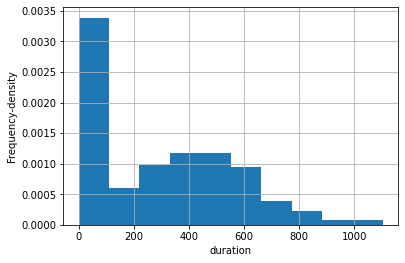

The distribution is skewed to the right

Statistics on: duration
count    2237.000000
mean      291.347340
std       269.363489
min         0.000000
25%         0.000000
50%       288.000000
75%       496.000000
max      1104.000000
Name: duration, dtype: float64

Variance:  72524.25441067216
Standart diviation:  269.3032759003725

                     gigas     


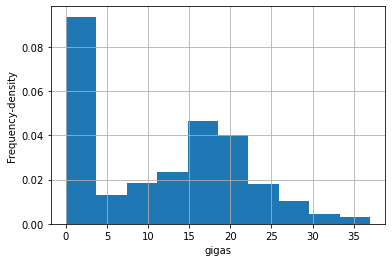

The distribution is skewed to the left

Statistics on: gigas
count    2237.00000
mean       11.47966
std         9.78993
min         0.00000
25%         0.00000
50%        13.00000
75%        19.00000
max        37.00000
Name: gigas, dtype: float64

Variance:  95.79987686267131
Standart diviation:  9.787741152210316

                     messages     


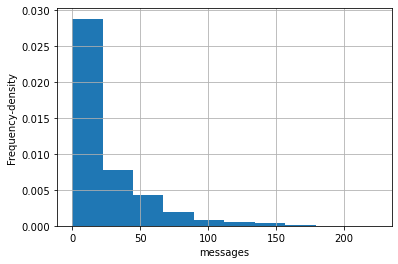

The distribution is skewed to the right

Statistics on: messages
count    2237.000000
mean       21.144837
std        30.731664
min         0.000000
25%         0.000000
50%         4.000000
75%        34.000000
max       224.000000
Name: messages, dtype: float64

Variance:  944.0129963636269
Standart diviation:  30.72479448854991



In [75]:
#a loop that aplly the function 'distribution_stats' on the columns in Interest.

for parameter in ['duration','gigas','messages']:
    distribution_stats(surf_plan,parameter)


                     duration     


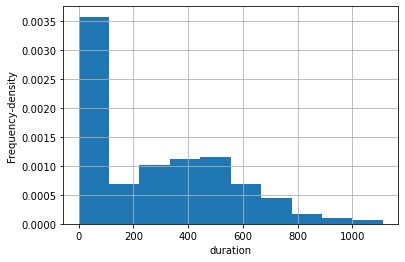

The distribution is skewed to the right

Statistics on: duration
count    1057.000000
mean      276.526963
std       267.699709
min         0.000000
25%         0.000000
50%       254.000000
75%       476.000000
max      1111.000000
Name: duration, dtype: float64

Variance:  71595.33536570628
Standart diviation:  267.5730467848103

                     gigas     


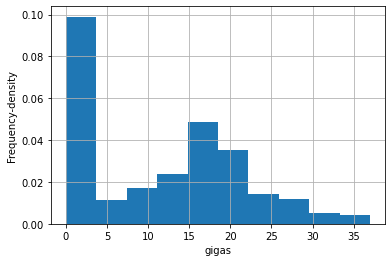

The distribution is skewed to the left

Statistics on: gigas
count    1057.000000
mean       11.271523
std        10.015758
min         0.000000
25%         0.000000
50%        13.000000
75%        19.000000
max        37.000000
Name: gigas, dtype: float64

Variance:  100.22050411322823
Standart diviation:  10.01101913459505

                     messages     


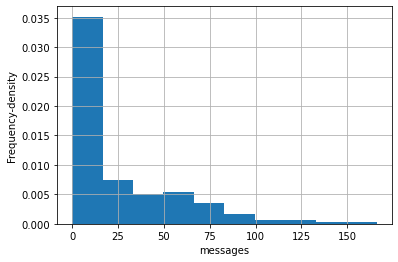

The distribution is skewed to the right

Statistics on: messages
count    1057.000000
mean       23.741722
std        32.535827
min         0.000000
25%         0.000000
50%         5.000000
75%        41.000000
max       166.000000
Name: messages, dtype: float64

Variance:  1057.5785147267852
Standart diviation:  32.520432265374104



In [76]:
#a loop that aplly the function 'distribution_stats' on the columns in Interest.

for parameter in ['duration','gigas','messages']:
    distribution_stats(ultimate_plan,parameter)

Investigating the histograms above, it looks like the distrebution of messages, calls duration and mb used in both plans is not that different.

The surf useres calls duration avrege is 291.5, and the ultimate average is 276.4. 

The surf useres messages send in a month avrege is 21.235950, and the ultimate average is 24.108083

The surf useres and the ultimate users both have a 13 Gigabytes used median per month. (I ued the media here and not the mean becaue the distribution is skewed to the left on mb used in both plans. 

From these investigation it appears that the users of surf plan uses slighlty more services than the ultimate plan users, except with data usage. We cant tell that for sure unless we conduct further investigation, wich we dont need because that is not one of questions we were asked. 
 


### Cheacking the Hypothesises ###


Finally, i will test the The hypotheses that were in question:


The first Hypothesis :

Does the average revenue from users of Ultimate and Surf calling plans differs?


In order to do that will formulate two hypotheses - A null hypitheses H0, and the alternative hypothesis- H1

H0: The average revenue from users of Ultimate and Surf calling plans is equal.

H1: The the average revenue from users of Ultimate and Surf calling plans is not equal.


Note: We can only make assumptions about a statistical population and calculate how likely we'd be to get a given sample if our assumptions were correct. If the probability is relatively high, the data doesn’t give us grounds to reject an assumption. If the probability is low, then from the given data we can conclude that our assumption is most likely incorrect (but we can’t disprove it or prove the opposite).

In [77]:
st.levene(surf_plan['montly_revenue'],ultimate_plan['montly_revenue'],center = 'mean')
#A test to determine wether the sampled have equal variance. 
##if the test rejects (pvalue < alpha) we need use equal_var=  False. 

LeveneResult(statistic=1333.5548300967093, pvalue=1.9594473613912144e-245)

In [78]:
#in order to determine whether to reject the null hypothesis or not
##We set a threshold for statistical significance.critical statistical significance level - alpha
# if the p-value is less than alpha, we reject the null hypothesis -H0

alpha = 0.05 #

#now i will conduct a test to determine wether the means of the two samples are equal. 

results = st.ttest_ind(surf_plan['montly_revenue'], ultimate_plan['montly_revenue'],equal_var = False)


print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis") 

p-value:  3.1633612800808614e-123
We reject the null hypothesis


Now we can dismiss the null hypothesis which says the means of the two samples are the same.
There is no evidence sustainable enough to prove that. H1 (alternate hypothesis) is however true - we can make the assumption that the average revenue from users of Ultimate and Surf calling plans differs. 

The second hypothesis i want to test:

does the average revenue from users in NY-NJ area is different from that of the users from other regions?


In order to do that  will formulate two hypotheses - A null hypitheses H0, and the alternative hypothesis- H1


H0: The average revenue from users in NY-NJ area and the users from other regions is equal.

H1: average revenue from users in NY-NJ area is different from that of the users from other regions.



In [79]:
#In order to check the second hypothesis, i will create one dataframe with NY-NJ users and one with the rest. 
NY_NJ_users =clean_total_telecom[clean_total_telecom['city'].str.contains("NY-NJ")]
other_areas =clean_total_telecom[~clean_total_telecom['city'].str.contains("NY-NJ")]


In [80]:
st.levene(NY_NJ_users['montly_revenue'],other_areas['montly_revenue'],center = 'mean')
#A test to determine wether the sampled have equal variance. 
##if the test fails rejects (pvalue > alpha) we need use equal_var=  True. 

LeveneResult(statistic=2.375765972573336, pvalue=0.12332725331361416)

In [81]:

alpha = 0.05  # critical statistical significance level

#now i will conduct a test to determine wether the means of the two samples are equal. 

results2 = st.ttest_ind(NY_NJ_users['montly_revenue'], other_areas['montly_revenue'],equal_var = True)

# if the p-value is less than alpha, we reject the null hypothesis -H0:

print('p-value: ', results2.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis") 

p-value:  0.18043096061318595
We reject the null hypothesis


Again we can dismiss the null hypothesis, which says the means of the two samples are the same.
. H1 (alternate hypothesis) is considerd true - we can make the assumption that the average revenue from users in NY-NJ area is different from that of the users from other regions.

### CONCLUSION ###

In this project, i wanted to test two hypotheses about the revenue generated from Megaline users:

does the average revenue from users of Ultimate and Surf calling plans differs?

does the average revenue from users in NY-NJ area is different from that of the users from other regions?

In order to test these two hypotheses, i did the following:

1. I Opened the data file and study the general information

2. I created a single data frame that contains all the information i needed (the sum of the calls duration for each user per month, the total megabytes used by each user per month and the total amount of texts sent by each user per month).
3. I calculated the revenue each user generated each month, according to the plan he was registered to.

4. I created different dataframes for each group - by plan (ultimate and surf) and by region (NY-NJ area and other areas)

5. I performed a t-test in order to see wether the hypotheses ware true.

Here are my findings:

1. From the investigations i made, i can make the assumption that the average revenue from users of Ultimate and Surf calling plans differs.

2. From the investigations i made, i can make the assumption that the average revenue from users in NY-NJ area is different from that of the users from other regions.



